#### TITLE: Analyze Employee Exit Surveys

#### DESCRIPTION: Answer the following questions-

1.  Are there differences in dissatisfaction due to  employee years of service?
2.  Are there differences in dissatisfaction due to  employee age?







*STEP 1*: a) import needed libraries, b) read csv files into dataframes

In [1]:
import numpy as np
import pandas as pd

In [2]:
tafe_survey = pd.read_csv(r"c:\users\drrdm\Data Quest Guided Projects\5th Guided Project- Job Dissatisfaction Surveys\tafe-employee-exit-survey-access-database-december-2013.csv", encoding = 'UTF-8')

In [3]:
dete_survey = pd.read_csv(r"c:\users\drrdm\Data Quest Guided Projects\5th Guided Project- Job Dissatisfaction Surveys\dete-exit-survey-january-2014.csv",encoding = 'Latin-1')

*STEP 2*: Review summary data and 1st entry lines of dataframes

In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [5]:
dete_survey['Dissatisfaction with the department'].value_counts()

False    761
True      61
Name: Dissatisfaction with the department, dtype: int64

In [6]:
dete_survey['Job dissatisfaction'].value_counts()

False    733
True      89
Name: Job dissatisfaction, dtype: int64

<font color=red>OBSERVATIONS</font> 


- 822 rows, 56 columns
- A number of columns have missing values.
- All columns are objects (no numeric)
- To answer questions, `Role Start` and `Cessation` dates for employment provided
- To answer questions, `Age` provided
- To answer questions, `Job dissatisfaction` and `dissatisfaction with department` provided. No missing data in these columns, boolean data.



In [7]:
dete_survey.head(1)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes


In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

In [9]:
(tafe_survey['Contributing Factors. Job Dissatisfaction']
     .value_counts()
)

-0                     360
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

<font color=red>OBSERVATIONS</font> 


- 701 rows, 72 columns
- A number of columns have missing values.
- All columns but 1 are objects
- To answer questions, gives `Length of Service` at workplace and "institute".
- To answer questions, `Age` provided
- To answer questions, column indicating `Contributing Factors. Job Dissatisfaction` and `Contributing Factors. Dissatisfaction` provided.  Not boolean, value missing if Dissatisfaction not a contributing factor.

In [10]:
tafe_survey.head(2)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender.What is your Gender?,CurrentAge.Current Age,Employment Type.Employment Type,Classification.Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 � 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-0,-0,-0,-0,-0,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


*Step 3*- Develop Overall Strategy:

Based on the questions and what's in the dataframes, I will do the following:

- Remove all columns except those identified in <font color=red>OBSERVATIONS</font>.  


- Make a new column indicating the survey name and populate with the name.


- Make a new column in each survey df where any `True` row(index) in either dissatisfaction column registers as `True`. Name the new column `Combined_Dissatisfaction`.


- For the `dete_survey` df , convert the date to numeric (reference the DateTime module from a while back). Use the start and terminates dates and arithmetic to create a new column `length of service` (in years).


- Convert the tafe_survey `Length of Service` to numeric.


- Change column names so that `Age` and `Length of Service` have the same name (so they make a single column at merge).


- Merge the two surveys.


- Convert the `Age` column to numeric.


- Make a Histogram plot of `Age`, `Length of Service`.


- Based on Histogram, divide survey into "older/younger" and "long/short" term of service.


- Make a Bar plot with basic statistics to see if `Combined_Dissatisfaction` differences exist older/younger and long/short. 


- NOTE:  This is the initial strategy.  While workng through these steps additional steps were need which I added to a Google doc version of this strategy.



In [11]:
#obtain needed columns for dete
dete_need_cols = dete_survey[['Cease Date', 
                             'Role Start Date',
                            'Job dissatisfaction',
                            'Dissatisfaction with the department',
                            'Age'
                            ]].copy()
#check
dete_need_cols.head()

,Cease Date,Role Start Date,Job dissatisfaction,Dissatisfaction with the department,Age
0,08/2012,2004,True,False,56-60
1,08/2012,Not Stated,False,False,56-60
2,05/2012,2011,False,False,61 or older
3,05/2012,2006,False,False,36-40
4,05/2012,1989,False,False,61 or older


In [12]:
#obtain needed columns for tafe
tafe_need_cols = tafe_survey[
    ['Contributing Factors. Dissatisfaction',
     'Contributing Factors. Job Dissatisfaction', 'CurrentAge.Current Age',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)'
    ]].copy()

#check
tafe_need_cols.head()

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,CurrentAge.Current Age,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,NaN,NaN,26 � 30,1-2,1-2
1,-0,-0,NaN,NaN,NaN
2,-0,-0,NaN,NaN,NaN
3,-0,-0,NaN,NaN,NaN
4,-0,-0,41 � 45,3-4,3-4


In [13]:
#Change tafe survey long column names

(tafe_need_cols.rename(columns = {'Contributing Factors. Dissatisfaction': 'Dissatisfaction',
     'Contributing Factors. Job Dissatisfaction': 'Job_Dissatisfaction',
    'CurrentAge.Current Age':'Age',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'Institute_Service_Length',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'Workplace_Service_Length'},
inplace = True)
)

#check
tafe_need_cols.head(2)

,Dissatisfaction,Job_Dissatisfaction,Age,Institute_Service_Length,Workplace_Service_Length
0,NaN,NaN,26 � 30,1-2,1-2
1,-0,-0,NaN,NaN,NaN


In [14]:
#Change dete survey long column name
(dete_need_cols.rename(columns = {'Dissatisfaction with the department':
                                  'Dept_Dissatisfaction', 'Cease Date': 'Cease_Date',
                                  'Role Start Date': 'Role_Start_Date',
                                  'Job dissatisfaction': 'Job_Dissatisfaction'}, inplace = True )
)

#check
dete_need_cols.head()

,Cease_Date,Role_Start_Date,Job_Dissatisfaction,Dept_Dissatisfaction,Age
0,08/2012,2004,True,False,56-60
1,08/2012,Not Stated,False,False,56-60
2,05/2012,2011,False,False,61 or older
3,05/2012,2006,False,False,36-40
4,05/2012,1989,False,False,61 or older


In [15]:
#dete Age column to numeric (mid point of range)
dete_need_cols['Age'].unique()

array(['56-60', '61 or older', '36-40', '41-45', '31-35', '46-50',
       '51-55', '21-25', '26-30', nan, '20 or younger'], dtype=object)

In [16]:
#dete map to the midpoint of range (DON'T RERUN MAP, WILL WRITE OVER)
Age_Map = {'20 or younger': 20, '21-25': 23,
          '26-30': 28, '56-60': 58, '61 or older': 61, '36-40': 38, '41-45': 43, 
           '31-35': 33, '46-50': 48, '51-55': 53,}

dete_need_cols['Age'] = dete_need_cols['Age'].map(Age_Map)

#check
dete_need_cols.head()

,Cease_Date,Role_Start_Date,Job_Dissatisfaction,Dept_Dissatisfaction,Age
0,08/2012,2004,True,False,58.0
1,08/2012,Not Stated,False,False,58.0
2,05/2012,2011,False,False,61.0
3,05/2012,2006,False,False,38.0
4,05/2012,1989,False,False,61.0


In [17]:
#check
dete_need_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 5 columns):
Cease_Date              822 non-null object
Role_Start_Date         822 non-null object
Job_Dissatisfaction     822 non-null bool
Dept_Dissatisfaction    822 non-null bool
Age                     811 non-null float64
dtypes: bool(2), float64(1), object(2)
memory usage: 20.9+ KB


In [18]:
#tafe unique values in column going to numeric (mid point of range)

print(tafe_need_cols['Age'].unique())
print(tafe_need_cols['Institute_Service_Length'].unique())
print(tafe_need_cols['Workplace_Service_Length'].unique())

['26 � 30' nan '41 � 45' '56 or older' '20 or younger' '46 � 50' '36 � 40'
 '21 � 25' '51-55' '31 � 35']
['1-2' nan '3-4' '7-10' 'Less than 1 year' '11-20' '5-6'
 'More than 20 years']
['1-2' nan '3-4' '7-10' 'Less than 1 year' '11-20' '5-6'
 'More than 20 years']


In [19]:
#tafe mapping of mid range to Age and Service Length columns

tafe_Age_Map = {'26 � 30' : 28, '41 � 45': 43, '56 or older': 56, 
                '20 or younger': 20,'46 � 50': 48, '36 � 40': 38, '21 � 25':23, 
                '51-55': 53, '31 � 35': 33}

tafe_need_cols['Age'] = tafe_need_cols['Age'].map(tafe_Age_Map)

tafe_ins_ser_Map = {'1-2': 2, '3-4': 4, '7-10': 9, 
                    'Less than 1 year': 1, '11-20': 16, '5-6': 6,'More than 20 years': 20}

tafe_need_cols['Institute_Service_Length'] = tafe_need_cols['Institute_Service_Length'].map(tafe_ins_ser_Map)

tafe_wp_ser_Map = {'1-2': 2, '3-4': 4, '7-10': 9, 
                    'Less than 1 year': 1, '11-20': 16, '5-6': 6, 'More than 20 years': 20}

tafe_need_cols['Workplace_Service_Length'] = (tafe_need_cols['Workplace_Service_Length'].map(tafe_ins_ser_Map))

#check
tafe_need_cols.head()

,Dissatisfaction,Job_Dissatisfaction,Age,Institute_Service_Length,Workplace_Service_Length
0,NaN,NaN,28.0,2.0,2.0
1,-0,-0,NaN,NaN,NaN
2,-0,-0,NaN,NaN,NaN
3,-0,-0,NaN,NaN,NaN
4,-0,-0,43.0,4.0,4.0


In [20]:
#create dbase identifying columns

dete_need_cols["Database"] = "dete_survey"
tafe_need_cols["Database"] = "tafe_survey"

#check
print(dete_need_cols.head(1))
print(tafe_need_cols.head(1))

  Cease_Date Role_Start_Date  Job_Dissatisfaction  Dept_Dissatisfaction   Age  \
0    08/2012            2004                 True                 False  58.0   

      Database  
0  dete_survey  
  Dissatisfaction Job_Dissatisfaction   Age  Institute_Service_Length  \
0             NaN                 NaN  28.0                       2.0   

   Workplace_Service_Length     Database  
0                       2.0  tafe_survey  


In [21]:
#create combined dissatisfaction column for tafe_need_cols

tafe_need_cols["Dissatisfaction"].value_counts()
tafe_need_cols["Job_Dissatisfaction"].value_counts()

tafe_dis_bool = (tafe_need_cols["Dissatisfaction"] == 'Contributing Factors. Dissatisfaction'
                ) | (tafe_need_cols["Job_Dissatisfaction"] == 'Job Dissatisfaction')

tafe_need_cols['Combined_Dissatisfaction'] = tafe_dis_bool

#check
tafe_need_cols.head()

,Dissatisfaction,Job_Dissatisfaction,Age,Institute_Service_Length,Workplace_Service_Length,Database,Combined_Dissatisfaction
0,NaN,NaN,28.0,2.0,2.0,tafe_survey,False
1,-0,-0,NaN,NaN,NaN,tafe_survey,False
2,-0,-0,NaN,NaN,NaN,tafe_survey,False
3,-0,-0,NaN,NaN,NaN,tafe_survey,False
4,-0,-0,43.0,4.0,4.0,tafe_survey,False


In [22]:
#create combined dissatisfaction column for dete_need_cols

dete_dis_bool = (dete_need_cols["Job_Dissatisfaction"] == True
                ) | (dete_need_cols["Dept_Dissatisfaction"] == True)

dete_need_cols['Combined_Dissatisfaction'] = dete_dis_bool

#check
dete_need_cols.head()

,Cease_Date,Role_Start_Date,Job_Dissatisfaction,Dept_Dissatisfaction,Age,Database,Combined_Dissatisfaction
0,08/2012,2004,True,False,58.0,dete_survey,True
1,08/2012,Not Stated,False,False,58.0,dete_survey,False
2,05/2012,2011,False,False,61.0,dete_survey,False
3,05/2012,2006,False,False,38.0,dete_survey,False
4,05/2012,1989,False,False,61.0,dete_survey,False


In [23]:
dete_need_cols['Combined_Dissatisfaction'].value_counts()

False    696
True     126
Name: Combined_Dissatisfaction, dtype: int64

In [24]:
# convert dete_need_cols string dates to int years, subtract, put into length of service column

dete_need_cols['Cease_Date'] = dete_need_cols['Cease_Date'].str[-4:] #Stack Overflow help
dete_need_cols = dete_need_cols[dete_need_cols.Cease_Date != 'ated'] 

dete_need_cols = dete_need_cols[dete_need_cols.Role_Start_Date != 'Not Stated']

dete_need_cols['Cease_Date'] = pd.to_numeric(dete_need_cols['Cease_Date'])
dete_need_cols['Role_Start_Date'] = dete_need_cols['Role_Start_Date'].astype(int)

dete_need_cols['Service_Length'] = dete_need_cols['Cease_Date'] - dete_need_cols['Role_Start_Date']

In [25]:
dete_need_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 0 to 820
Data columns (total 8 columns):
Cease_Date                  697 non-null int64
Role_Start_Date             697 non-null int32
Job_Dissatisfaction         697 non-null bool
Dept_Dissatisfaction        697 non-null bool
Age                         693 non-null float64
Database                    697 non-null object
Combined_Dissatisfaction    697 non-null bool
Service_Length              697 non-null int64
dtypes: bool(3), float64(1), int32(1), int64(2), object(1)
memory usage: 32.0+ KB


<font color=blue>NOTE</font>: missing data on `Age` 

In [26]:
print(dete_need_cols.head())
print('\n')
print(tafe_need_cols.head())

   Cease_Date  Role_Start_Date  Job_Dissatisfaction  Dept_Dissatisfaction  \
0        2012             2004                 True                 False   
2        2012             2011                False                 False   
3        2012             2006                False                 False   
4        2012             1989                False                 False   
5        2012             1997                False                 False   

    Age     Database  Combined_Dissatisfaction  Service_Length  
0  58.0  dete_survey                      True               8  
2  61.0  dete_survey                     False               1  
3  38.0  dete_survey                     False               6  
4  61.0  dete_survey                     False              23  
5  43.0  dete_survey                     False              15  


  Dissatisfaction Job_Dissatisfaction   Age  Institute_Service_Length  \
0             NaN                 NaN  28.0                       2.0   

In [27]:
#replace missing values

dete_need_cols['Age'].fillna(0, inplace = True)
tafe_need_cols['Age'].fillna(0, inplace = True)
tafe_need_cols['Workplace_Service_Length'].fillna(0, inplace = True)
tafe_need_cols['Institute_Service_Length'].fillna(0, inplace = True)

#check
print(dete_need_cols.head())
print(tafe_need_cols.head())

   Cease_Date  Role_Start_Date  Job_Dissatisfaction  Dept_Dissatisfaction  \
0        2012             2004                 True                 False   
2        2012             2011                False                 False   
3        2012             2006                False                 False   
4        2012             1989                False                 False   
5        2012             1997                False                 False   

    Age     Database  Combined_Dissatisfaction  Service_Length  
0  58.0  dete_survey                      True               8  
2  61.0  dete_survey                     False               1  
3  38.0  dete_survey                     False               6  
4  61.0  dete_survey                     False              23  
5  43.0  dete_survey                     False              15  
  Dissatisfaction Job_Dissatisfaction   Age  Institute_Service_Length  \
0             NaN                 NaN  28.0                       2.0   
1

In [28]:
#tafe service length (choose the largest from Institute and Workplace)

tafe_need_cols.loc[tafe_need_cols.Workplace_Service_Length <= tafe_need_cols.Institute_Service_Length,
                  'Service_Length'] = tafe_need_cols['Institute_Service_Length']

tafe_need_cols.loc[tafe_need_cols.Workplace_Service_Length > tafe_need_cols.Institute_Service_Length,
                  'Service_Length'] = tafe_need_cols['Workplace_Service_Length']

#check
print(tafe_need_cols.head())
print('\n')
print(dete_need_cols.head())

  Dissatisfaction Job_Dissatisfaction   Age  Institute_Service_Length  \
0             NaN                 NaN  28.0                       2.0   
1              -0                  -0   0.0                       0.0   
2              -0                  -0   0.0                       0.0   
3              -0                  -0   0.0                       0.0   
4              -0                  -0  43.0                       4.0   

   Workplace_Service_Length     Database  Combined_Dissatisfaction  \
0                       2.0  tafe_survey                     False   
1                       0.0  tafe_survey                     False   
2                       0.0  tafe_survey                     False   
3                       0.0  tafe_survey                     False   
4                       4.0  tafe_survey                     False   

   Service_Length  
0             2.0  
1             0.0  
2             0.0  
3             0.0  
4             4.0  


   Cease_Date  Rol

In [29]:
#merge the df's with concatenate 
merge_cease_date = pd.concat([dete_need_cols, tafe_need_cols], sort = True)

In [30]:
merge_cease_date.head()

,Age,Cease_Date,Combined_Dissatisfaction,Database,Dept_Dissatisfaction,Dissatisfaction,Institute_Service_Length,Job_Dissatisfaction,Role_Start_Date,Service_Length,Workplace_Service_Length
0,58.0,2012.0,True,dete_survey,False,NaN,NaN,True,2004.0,8.0,NaN
2,61.0,2012.0,False,dete_survey,False,NaN,NaN,False,2011.0,1.0,NaN
3,38.0,2012.0,False,dete_survey,False,NaN,NaN,False,2006.0,6.0,NaN
4,61.0,2012.0,False,dete_survey,False,NaN,NaN,False,1989.0,23.0,NaN
5,43.0,2012.0,False,dete_survey,False,NaN,NaN,False,1997.0,15.0,NaN


In [31]:
#graph

import matplotlib as plt

In [32]:
#histogram of Age
merge_cease_date['Age'].plot(kind = 'hist', bins = 20, title = 'Age')

In [33]:
merge_cease_date['Age'].value_counts()

61.0    185
53.0    175
56.0    162
58.0    142
43.0    134
0.0     110
48.0    108
28.0    100
38.0     96
33.0     89
23.0     81
20.0     17
Name: Age, dtype: int64

In [34]:
#Age = 0 as nan
merge_cease_date.loc[merge_cease_date['Age'] <= 0,'Age'] = np.nan

In [35]:
merge_cease_date['Age'].value_counts()

61.0    185
53.0    175
56.0    162
58.0    142
43.0    134
48.0    108
28.0    100
38.0     96
33.0     89
23.0     81
20.0     17
Name: Age, dtype: int64

In [36]:
merge_cease_date['Service_Length'].value_counts()

 1.0       196
 0.0       171
 2.0       145
 4.0       141
 16.0      108
 20.0       89
 6.0        75
 9.0        63
 3.0        43
 5.0        38
 7.0        26
 13.0       21
 14.0       19
 8.0        19
 15.0       18
 11.0       17
 10.0       16
 17.0       16
 24.0       16
 23.0       15
 21.0       14
 12.0       13
 19.0       10
 26.0        9
 22.0        9
 18.0        9
 37.0        9
 34.0        8
 25.0        8
 27.0        8
 38.0        7
 31.0        7
 35.0        6
 29.0        5
 33.0        4
 30.0        4
 36.0        4
 32.0        3
 42.0        3
 28.0        2
 40.0        1
 39.0        1
 43.0        1
-1.0         1
 1813.0      1
Name: Service_Length, dtype: int64

In [37]:
# Service length data entry error, 0 or negative as nan
merge_cease_date.loc[merge_cease_date['Service_Length'] == 1813,'Service_Length'] = np.nan

In [38]:
merge_cease_date.loc[merge_cease_date['Service_Length'] <= 0,'Service_Length'] = np.nan

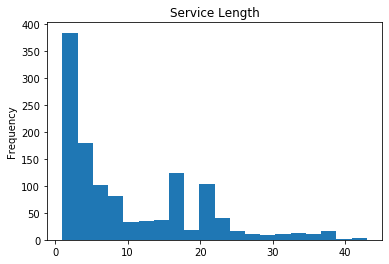

In [39]:
#plot service length
merge_cease_date['Service_Length'].plot(kind = 'hist', bins = 20, title = 'Service Length')

In [40]:
merge_cease_date['Service_Length'].mean()

10.01141924959217

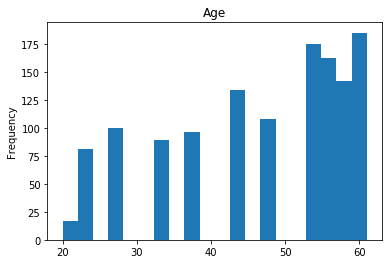

In [41]:
#replot Age
merge_cease_date['Age'].plot(kind = 'hist', bins = 20, title = 'Age')

In [42]:
merge_cease_date['Age'].mean()

46.859581070597365

In [43]:
merge_cease_date['Combined_Dissatisfaction'].value_counts()

False    1207
True      192
Name: Combined_Dissatisfaction, dtype: int64

<font color=red>Observations</font>

1. For `Age` the non zero mean is about 45
2. For `Service_Length` the non zero mean is about 10
3. Out of the approx 1400 rows of data, about 200 individuals reported Job Dissatisfaction as a reason for leaving


<font color=red>NOTE:</font>

Decided to group `Age` and `Length of Service` into 4 groups: Older employees with long service, Older employees with short service and Younger employees.  I think it will be more insightful to compare these 4 groups and their job dissatisfaction rates.
    

In [44]:
def myagegroup(element):
    if element >= 45:
        return 'Older'
    else:
        return "Younger"

In [45]:
def myservgroup(element):
    if element >= 10:
        return "Short_Service"
    else:
        return "Long_Service"

In [46]:
type(myagegroup)

function

In [47]:
#convert Age numeric values to strings 
merge_cease_date['Age'] = merge_cease_date['Age'].map(myagegroup)

In [48]:
#convert Service length numeric values to strings
merge_cease_date['Service_Length'] = merge_cease_date['Service_Length'].map(myservgroup)

In [49]:
merge_cease_date.head()

,Age,Cease_Date,Combined_Dissatisfaction,Database,Dept_Dissatisfaction,Dissatisfaction,Institute_Service_Length,Job_Dissatisfaction,Role_Start_Date,Service_Length,Workplace_Service_Length
0,Older,2012.0,True,dete_survey,False,NaN,NaN,True,2004.0,Long_Service,NaN
2,Older,2012.0,False,dete_survey,False,NaN,NaN,False,2011.0,Long_Service,NaN
3,Younger,2012.0,False,dete_survey,False,NaN,NaN,False,2006.0,Long_Service,NaN
4,Older,2012.0,False,dete_survey,False,NaN,NaN,False,1989.0,Short_Service,NaN
5,Younger,2012.0,False,dete_survey,False,NaN,NaN,False,1997.0,Short_Service,NaN


In [50]:
#create the final dataset
final_dset = merge_cease_date[['Age', 
                             'Combined_Dissatisfaction',
                            'Service_Length',
                              ]].copy()

In [51]:
final_dset.head()

,Age,Combined_Dissatisfaction,Service_Length
0,Older,True,Long_Service
2,Older,False,Long_Service
3,Younger,False,Long_Service
4,Older,False,Short_Service
5,Younger,False,Short_Service


In [52]:
final_dset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 701
Data columns (total 3 columns):
Age                         1399 non-null object
Combined_Dissatisfaction    1399 non-null bool
Service_Length              1399 non-null object
dtypes: bool(1), object(2)
memory usage: 34.2+ KB


In [53]:
#boolean filters
older_long_filter = ((final_dset["Age"] == 'Older') & 
                     (final_dset['Service_Length'] == 'Long_Service')
                    )
older_short_filter = ((final_dset["Age"] == 'Older') & 
                     (final_dset['Service_Length'] == 'Short_Service')
                    )
young_long_filter = ((final_dset["Age"] == 'Younger') & 
                     (final_dset['Service_Length'] == 'Long_Service')
                    )
young_short_filter = ((final_dset["Age"] == 'Younger') & 
                     (final_dset['Service_Length'] == 'Short_Service')
                    )

In [54]:
older_long = final_dset[older_long_filter]
print(older_long['Combined_Dissatisfaction'].value_counts())

False    278
True      51
Name: Combined_Dissatisfaction, dtype: int64


In [55]:
older_short = final_dset[older_short_filter]
print(older_short['Combined_Dissatisfaction'].value_counts())

False    385
True      58
Name: Combined_Dissatisfaction, dtype: int64


In [56]:
young_long = final_dset[young_long_filter]
print(young_long['Combined_Dissatisfaction'].value_counts())

False    512
True      78
Name: Combined_Dissatisfaction, dtype: int64


In [57]:
young_short = final_dset[young_short_filter]
print(young_short['Combined_Dissatisfaction'].value_counts())

False    32
True      5
Name: Combined_Dissatisfaction, dtype: int64


In [58]:
data = {'Group': ['old_long_perc', 'old_short_perc', 
                  'young_long_perc', 'young_short_perc'],
       'Perc': [51/278 * 100, 58/385 * 100, 78/512 * 100, 5/32 * 100]}

In [59]:
my_plot_df = pd.DataFrame(data)

In [60]:
my_plot_df

,Group,Perc
0,old_long_perc,18.345324
1,old_short_perc,15.064935
2,young_long_perc,15.234375
3,young_short_perc,15.625000


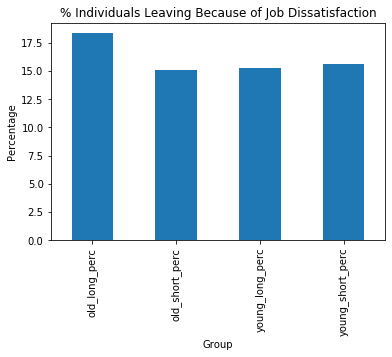

In [61]:
ax = my_plot_df.plot(kind = 'bar', x = 'Group', y = 'Perc', 
                title = '% Individuals Leaving Because of Job Dissatisfaction',
               )

ax.set_xlabel("Group")
ax.set_ylabel("Percentage")
ax.get_legend().remove()

<font color=red>CONCLUSION</font> 

The original questions being answered were - 

1.  Are there differences in dissatisfaction due to  employee years of service?
2.  Are there differences in dissatisfaction due to  employee age?

Based on the bar chart above, I conclude the older, long term employees have a slightly higher job dissatisfaction rate than the other employee groups. 
